<div>
      <img src="https://drive.google.com/uc?export=view&id=1XqMCyXys9E6QBvNAW8QSTAdT0dkB8aAa" width="40%" align="right"/>
</div>

<div>
        <br><h4>Herbi Shtini, Daniel Brauner, Felix Scharf</h4>
</div>

### Datenanalyse und -visualisierung


Im ersten Schritt werden die benötigten Bibliotheken installiert.
Wir verwenden numpy, pandas, seaborn und matplotlib. 

NumPy und Pandas sind Programmbibliotheken für die Programmiersprache Python, die die Handhabung großer mehrdimensionaler Arrays ermöglichen. 

Matplotlib und Seaborn sind ebenfalls Programmbibliotheken für Python, welche  Visualisierungen und Darstellungen ermöglichen.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

##### Gesäuberte Daten einlesen

Basis des weiteren Vorgehens ist der durch die vorangegangene Data-Preparation bereinigte Datensatz.

In [2]:
df = pd.read_pickle('data/immo_data_prepared_clean.pkl')

## Visualisierungen

### One-hot encoding

Zunächst wird der Datensatz für das Projekt vorbereitet. Hierbei wird mithilfe von One-hot-encoding ein Datensatz erzeugt, welcher lediglich noch Dezimal-Werte enthält. 

Für die Merkmale, die Text enthalten, wird pro Textmerkmal eine eigene Spalte angelegt. Dort, wo die Zeile der ursprünglichen Datenreihe einen Wert in Form des Textes enthält, wird die Zahl 1 in die jeweilige Spalte eingetragen, alle anderen Zellen enthalten eine 0.

In [3]:
df.head(3)

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,interiorQual,lift,typeOfFlat,noRooms,floor,garden,regio2,regio3,date
21,222.502694,central_heating,False,False,1412.502694,1975.0,False,False,1190.0,29.00,sophisticated,False,apartment,1.5,3.0,False,Stuttgart,Bad_Cannstatt,Oct19
23,180.000000,central_heating,False,False,2030.000000,1871.0,True,True,1850.0,81.00,luxury,False,apartment,2.0,4.0,False,München,Altstadt,Oct19
24,140.000000,central_heating,False,True,760.000000,1953.0,False,True,620.0,55.89,normal,False,apartment,3.0,2.0,False,Hamburg,Horn,May19


In [4]:

dfEncoded = pd.get_dummies(df.drop(['regio3'], axis=1))
dfEncoded = dfEncoded.astype({'newlyConst': int, 'balcony': int, 'cellar': int, 
                              'lift': int, 'garden': int, 'hasKitchen': int})   
dfEncoded.head(3)

,serviceCharge,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,lift,...,regio2_Berlin,regio2_Frankfurt_am_Main,regio2_Hamburg,regio2_Köln,regio2_München,regio2_Stuttgart,date_Feb20,date_May19,date_Oct19,date_Sep18
21,222.502694,0,0,1412.502694,1975.0,0,0,1190.0,29.00,0,...,0,0,0,0,0,1,0,0,1,0
23,180.000000,0,0,2030.000000,1871.0,1,1,1850.0,81.00,0,...,0,0,0,0,1,0,0,0,1,0
24,140.000000,0,1,760.000000,1953.0,0,1,620.0,55.89,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
df3 = df[['serviceCharge', 'totalRent', 'yearConstructed',
          'baseRent','livingSpace','noRooms','regio2']]
print(df3)

        serviceCharge    totalRent  yearConstructed  baseRent  livingSpace  \
21         222.502694  1412.502694           1975.0   1190.00        29.00   
23         180.000000  2030.000000           1871.0   1850.00        81.00   
24         140.000000   760.000000           1953.0    620.00        55.89   
45         320.000000  1140.000000           1995.0    820.00        77.00   
46         409.479747  2599.479747           1900.0   2190.00        96.00   
...               ...          ...              ...       ...          ...   
268819     150.000000  1330.000000           1955.0   1180.00        75.00   
268829     250.940000   828.770000           1972.0    577.83        72.64   
268839     100.000000  1980.000000           1900.0   1780.00        65.00   
268840     112.130000  1479.640000           2016.0   1255.38        89.67   
268849     315.000000  1250.000000           1972.0    935.00        77.00   

        noRooms             regio2  
21          1.5          S

##### Numerische Daten speichern 

Es stellt sich zunächst die Frage in welcher Stadt die meisten Inserate während des Beobachtungszeitraums geschaltet wurden.

Die Visualisierung soll uns einen Überblick geben, ob es Auffälligkeiten bzw. große Unterschiede in der Anzahl der geschalteten Anzeigen gibt. 

In [6]:
dfEncoded.to_pickle('data/immo_data_numerical.pkl')

Text(0, 0.5, 'Anzahl Inserate')

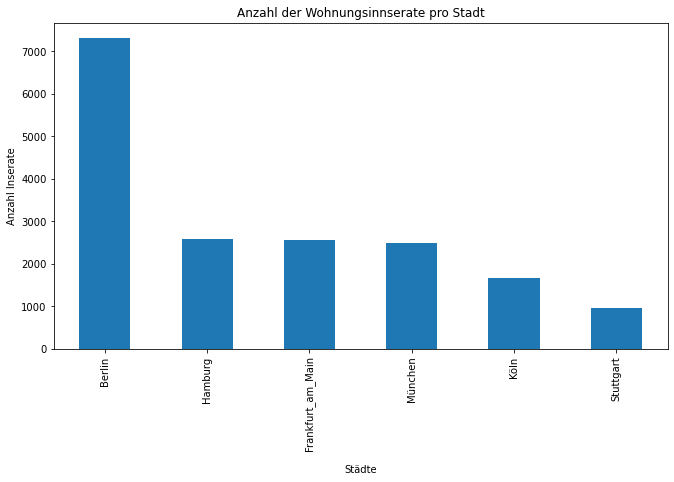

In [7]:
df['regio2'].value_counts().plot(kind='bar', figsize=(11,6))
plt.title('Anzahl der Wohnungsinnserate pro Stadt')
plt.xlabel('Städte', labelpad=14)
plt.ylabel('Anzahl Inserate')

Es zeigt sich, dass die meisten Inserate in Berlin geschaltet wurden. Woran liegt das?


Um den Datensatz besser zu verstehen und bereits erste Erkenntnisse ableiten zu können, werden verschiedene Visualisierungen mithilfe von matplotlib und seaborn durchgeführt.
Konkret wird zunächst das Verhältnis von Warm- und Kaltmiete in den jeweiligen Städten betrachtet.

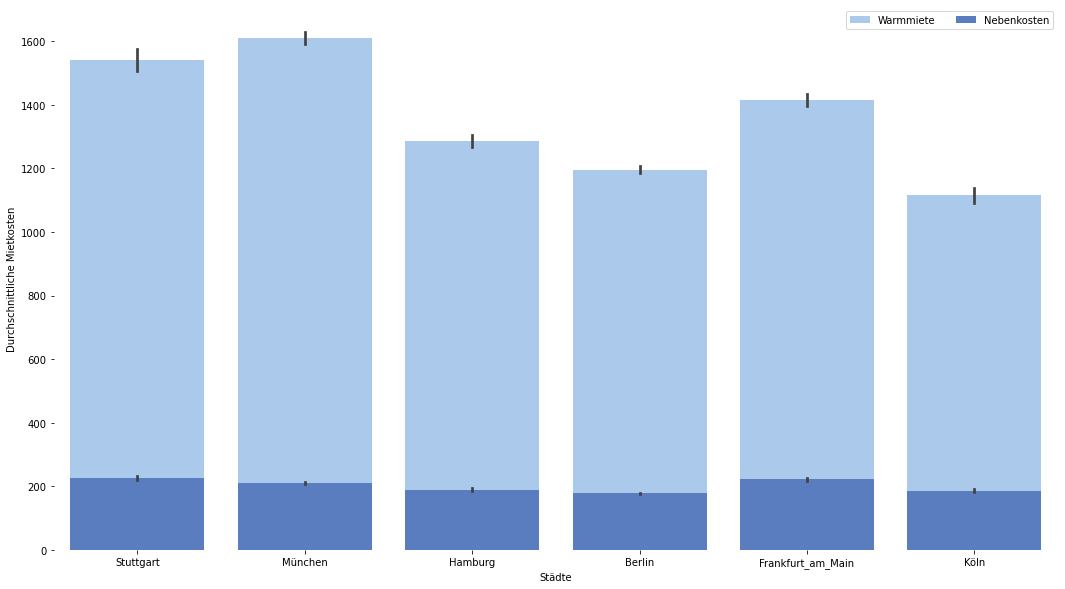

In [8]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))


# PLot für Warmmiete anlegen
sns.set_color_codes("pastel")
sns.barplot(x="regio2", y="totalRent" ,  data=df,
            label="Warmmiete", color="b")

# Plot für Nebenkosten anlegen
sns.set_color_codes("muted")
sns.barplot(x="regio2", y="serviceCharge", data=df,
            label="Nebenkosten", color="b")

# Legende + weitere Beschriftungen
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set( ylabel="Durchschnittliche Mietkosten",
       xlabel="Städte")
sns.despine(left=True, bottom=True)

Weiterhin soll mithilfe einer Korrelationsmatrix gezeigt werden, welche Faktoren im vorliegenden Datensatz eine erhöhte Abhängigkeit aufweisen.

Wir definieren eine hohe Korrelation mit Werten >0,3.
Mittels der seaborn-Korrelationsmatrix ergeben sich folgende erhöhte Abhängigkeiten:


<AxesSubplot:>

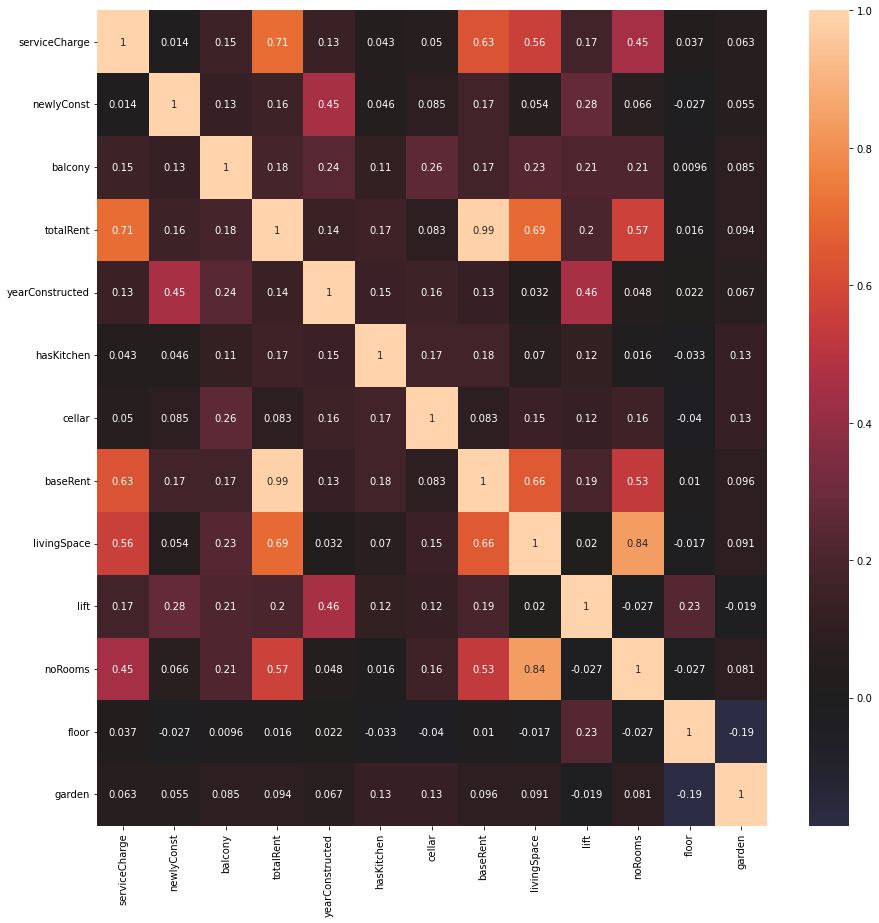

In [9]:
# Korrelationsmatrix um beurteilen zu können, welche Faktoren stark voneinander abhängen. 
# Unsere Definition, ab 0,3 ist eine Korrelation beachtenswert.
cor_matrix = df.corr()
plt.figure(figsize=(15,15))

sns.heatmap(cor_matrix, annot=True, center=0)

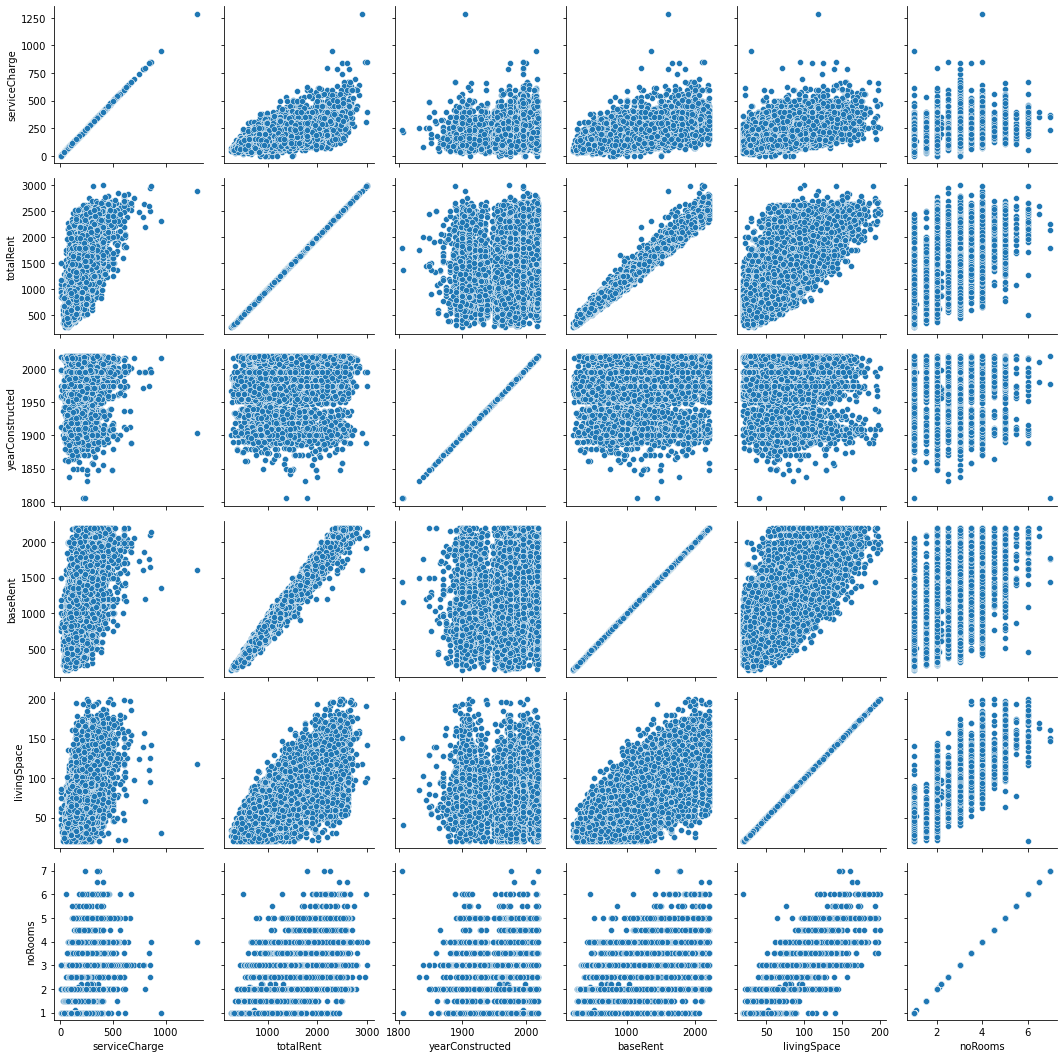

In [10]:
g = sns.PairGrid(df3)
g.map(sns.scatterplot)


# Zusammenfassung Visualisierung:

Ziel war es die festgelegten Datenbereiche zu visualieren und eine Aussage über die Sinnhaftigkeit erzielen zu können.

Es zeigt sich, dass die Bereiche sinnvoll gewählt sind.
